In [1]:
import pandas as pd

df = pd.read_csv('data\\top5_midfield.csv')
df.head()

,player,age,nationality,position,team,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,30.0,14.1,2.0,2.0,0.0,...,15.0,25.0,5.0,0.0,0.0,0.0,88.0,13.0,16.0,44.8
1,Paxten Aaronson,19,us USA,MF,Eint Frankfurt,7.0,1.1,0.0,1.0,0.0,...,6.0,4.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,100.0
2,Amine Adli,23,ma MAR,"MF,FW",Leverkusen,23.0,10.0,4.0,6.0,0.0,...,14.0,28.0,7.0,0.0,0.0,0.0,36.0,21.0,22.0,48.8
3,Kofi Amoako,18,de GER,MF,Wolfsburg,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Robert Andrich,28,de GER,"MF,DF",Leverkusen,28.0,18.8,4.0,2.0,0.0,...,23.0,14.0,0.0,0.0,0.0,0.0,122.0,20.0,22.0,47.6


In [2]:
turn_per90 = ['npxg_xg_assist', 'progressive_carries', 'progressive_passes', 'progressive_passes_received',
              'shots_free_kicks', 'passes_completed', 'passes', 'passes_short', 'passes_medium',
              'passes_long', 'pass_xa', 'key_passes', 'passes_into_final_third', 'passes_into_penalty_area',
              'crosses_into_penalty_area', 'passes_live', 'passes_dead', 'passes_free_kicks',
              'through_balls', 'passes_switches', 'crosses', 'throw_ins', 'corner_kicks', 'corner_kicks_in',
              'corner_kicks_out', 'passes_offsides', 'passes_blocked', 'sca_passes_live', 'sca_passes_dead',
              'sca_take_ons', 'sca_shots', 'sca_fouled', 'sca_defense', 'tackles', 'tackles_won',
              'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'challenge_tackles', 'challenges',
              'blocks', 'interceptions', 'clearances', 'touches', 'touches_def_pen_area', 'touches_def_3rd',
              'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball',
              'take_ons', 'carries', 'carries_distance', 'passes_total_distance', 'passes_progressive_distance',
              'carries_progressive_distance', 'carries_into_final_third', 'carries_into_penalty_area',
              'miscontrols', 'dispossessed', 'passes_received', 'fouls', 'fouled', 'ball_recoveries',
              'aerials_won', 'aerials_lost']

rename = {}

for col in turn_per90:
    rename[col] = f'{col}_per90'

In [3]:
for col in turn_per90:
    df[col] = df[col] / df['minutes_90s']

df = df.rename(columns = rename)

df = df[(df.games >= 10) & (df.minutes_90s >= 8)].reset_index()
df.drop('index', axis = 1, inplace = True)

ind = ['player', 'age', 'nationality', 'position', 'team', 'minutes_90s']
df.set_index(ind, inplace = True)
df

,,,,,,games,goals,assists,pens_att,cards_yellow,cards_red,xg,npxg,xg_assist,npxg_xg_assist_per90,...,fouls_per90,fouled_per90,offsides,pens_won,pens_conceded,own_goals,ball_recoveries_per90,aerials_won_per90,aerials_lost_per90,aerials_won_pct
player,age,nationality,position,team,minutes_90s,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,14.1,30.0,2.0,2.0,0.0,3.0,1.0,2.0,2.0,1.9,0.269504,...,1.063830,1.773050,5.0,0.0,0.0,0.0,6.241135,0.921986,1.134752,44.8
Amine Adli,23,ma MAR,"MF,FW",Leverkusen,10.0,23.0,4.0,6.0,0.0,5.0,0.0,3.3,3.3,2.3,0.560000,...,1.400000,2.800000,7.0,0.0,0.0,0.0,3.600000,2.100000,2.200000,48.8
Robert Andrich,28,de GER,"MF,DF",Leverkusen,18.8,28.0,4.0,2.0,0.0,4.0,0.0,1.7,1.7,1.8,0.186170,...,1.223404,0.744681,0.0,0.0,0.0,0.0,6.489362,1.063830,1.170213,47.6
Maximilian Arnold,29,de GER,MF,Wolfsburg,27.8,30.0,2.0,1.0,0.0,9.0,0.0,1.0,1.0,3.9,0.176259,...,1.330935,1.654676,0.0,0.0,0.0,0.0,6.258993,0.503597,1.079137,31.8
Leandro Barreiro Martins,23,lu LUX,MF,Mainz 05,29.0,31.0,4.0,1.0,0.0,8.0,0.0,4.5,4.5,1.1,0.193103,...,2.000000,1.793103,3.0,0.0,0.0,0.0,4.965517,1.344828,2.172414,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maxime Lopez,25,fr FRA,MF,Fiorentina/Sassuolo,10.5,21.0,0.0,0.0,0.0,1.0,1.0,0.2,0.2,0.8,0.095238,...,0.952381,0.666667,0.0,0.0,0.0,0.0,5.333333,0.285714,0.571429,33.3
Ryan Gravenberch,21,nl NED,MF,Bayern Munich/Liverpool,12.6,27.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.1,0.246032,...,1.666667,1.190476,0.0,0.0,0.0,0.0,5.873016,0.793651,1.111111,41.7
Lovro Majer,25,hr CRO,"MF,FW",Wolfsburg/Rennes,23.6,33.0,5.0,5.0,2.0,5.0,0.0,5.4,3.8,3.5,0.309322,...,1.567797,1.610169,1.0,1.0,0.0,0.0,6.144068,0.466102,0.762712,37.9


In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

n_components = 10
pca = PCA(n_components=n_components)

scaler = StandardScaler()
data_matrix_scaled = scaler.fit_transform(df)

pca.fit(data_matrix_scaled)

data_reduced = pca.transform(data_matrix_scaled)

print("Varianza spiegata dalle componenti principali:")
print(pca.explained_variance_ratio_)

Varianza spiegata dalle componenti principali:
[0.24149704 0.18432621 0.06998981 0.04687428 0.04394897 0.03039992
 0.02446947 0.02048384 0.01935493 0.01738752]


In [5]:
loadings = pd.DataFrame()

for i in range(0,10):
    loadings[f'PC{i+1}'] = pca.components_[i]

loadings.index = df.columns
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
games,0.017406,0.033214,-0.026255,0.153248,-0.072294,0.133338,0.056481,-0.138822,0.344673,0.115158
goals,0.117024,0.040435,0.078479,0.247644,-0.149653,-0.111276,0.078395,-0.067365,0.107973,0.045660
assists,0.106303,0.101448,-0.013877,0.123909,-0.000366,0.159824,-0.156393,-0.218663,0.185151,-0.017045
pens_att,0.042536,0.060713,-0.090664,0.113212,-0.055112,0.038192,0.214584,-0.068155,0.078962,0.112116
cards_yellow,-0.060357,0.018031,-0.016455,0.157229,0.019929,0.031974,0.159555,-0.107964,0.311423,0.138806
...,...,...,...,...,...,...,...,...,...,...
own_goals,-0.029026,0.002758,-0.009693,-0.023820,-0.006747,0.014406,0.037668,0.062319,0.038144,-0.146308
ball_recoveries_per90,-0.111829,0.066571,-0.001074,0.031644,0.128479,-0.086713,0.083788,-0.004812,0.079798,0.014610
aerials_won_per90,-0.045675,-0.076181,0.037008,0.198285,0.014129,0.125031,0.088041,0.331864,0.009220,-0.036788
aerials_lost_per90,0.010749,-0.111410,0.019859,0.125187,0.035608,0.039888,0.059225,0.302965,-0.061398,0.117708


In [6]:
eigens = {}
for i in range(0,10):
    eigens[f'PC{i+1}'] = pca.explained_variance_[i]

eigens

{'PC1': 25.162202686866884,
 'PC2': 19.205426198640065,
 'PC3': 7.292419825028177,
 'PC4': 4.8839528481337675,
 'PC5': 4.579157338628717,
 'PC6': 3.1674466179879506,
 'PC7': 2.54953731800434,
 'PC8': 2.134264665754872,
 'PC9': 2.016640588315207,
 'PC10': 1.811650651071609}

In [7]:
def plot_correlation_circle(labels, loadings = loadings, eigens = eigens, save:bool = False):
    fig, ax = plt.subplots(figsize=(15, 15))
    uso = loadings[labels]
    
    # Cerchio di correlazione
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    ax.add_artist(circle)

    x = []
    y = []
    label= []
    for i in loadings.index:
        x.append(loadings.loc[i, labels[0]] * np.sqrt(eigens[labels[0]]))
        y.append(loadings.loc[i, labels[1]] * np.sqrt(eigens[labels[1]]))
        label.append(i)

    plt.scatter(x, y, s = 1, alpha = 0.5)
    for i, lab in enumerate(label):
        plt.text(x[i], y[i], lab, fontsize = 7, ha = 'right')
    # Impostazioni del grafico
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(f'{labels[0]} ({eigens[labels[0]] / len(loadings):.2%})')
    ax.set_ylabel(f'{labels[1]} ({eigens[labels[1]] / len(loadings):.2%})')
    ax.set_title('Cerchio di Correlazione')
    ax.axhline(0, color='grey', linestyle='--')
    ax.axvline(0, color='grey', linestyle='--')
    plt.grid()
    if save == True:
        plt.savefig('corr.png')
    plt.show()


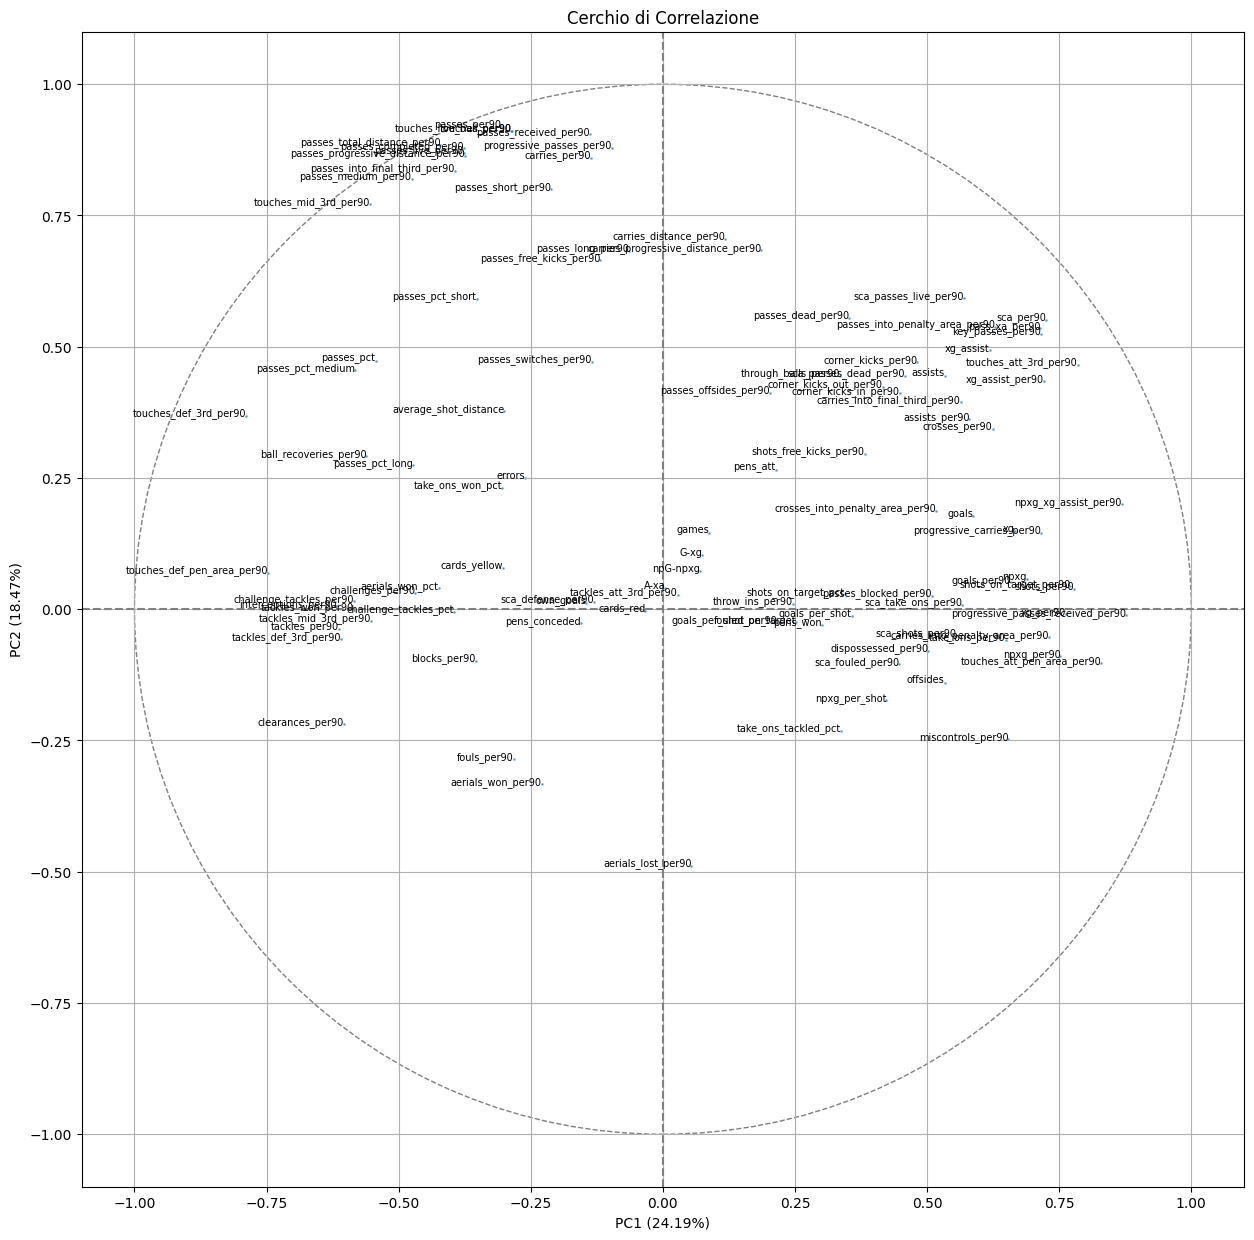

In [8]:
plot_correlation_circle(['PC1', 'PC2'])

In [10]:
scores = pd.DataFrame(data_reduced, columns = eigens.keys(), index = df.index)
scores

,,,,,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
player,age,nationality,position,team,minutes_90s,,,,,,,,,,
Brenden Aaronson,22,us USA,"MF,FW",Union Berlin,14.1,4.094390,-2.642933,2.396618,-1.245447,3.526711,-1.469847,-0.436453,-0.549793,0.550319,-0.657167
Amine Adli,23,ma MAR,"MF,FW",Leverkusen,10.0,9.722277,-0.172192,5.501466,1.650638,1.457889,1.398793,-1.014466,0.636256,-0.856374,-1.292084
Robert Andrich,28,de GER,"MF,DF",Leverkusen,18.8,-3.623929,5.923940,3.125520,0.731226,-3.586997,-1.312232,-0.853017,1.067542,-1.289290,-0.004898
Maximilian Arnold,29,de GER,MF,Wolfsburg,27.8,-2.810659,3.660399,-4.999992,0.830324,-1.297777,-2.131730,1.233037,0.081848,-0.381799,-0.812992
Leandro Barreiro Martins,23,lu LUX,MF,Mainz 05,29.0,-1.090217,-6.055362,0.211808,3.263900,-0.244481,0.674055,0.945840,0.281663,-0.325815,0.866473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maxime Lopez,25,fr FRA,MF,Fiorentina/Sassuolo,10.5,-5.546506,5.919682,0.016292,-3.572873,-2.230816,-0.177197,-1.063113,1.241953,-2.065778,1.784406
Ryan Gravenberch,21,nl NED,MF,Bayern Munich/Liverpool,12.6,2.430750,-1.245581,3.415456,-1.871483,2.560084,0.107637,0.589564,0.112551,-2.181080,-0.352712
Lovro Majer,25,hr CRO,"MF,FW",Wolfsburg/Rennes,23.6,4.958756,0.532483,-0.444424,0.343698,-0.440026,0.377225,0.370359,-1.064288,1.067986,0.836094


In [18]:
def stampa_scatter(labels, df = scores, save: bool = False):    
    colors = np.random.rand(len(df))

    x = labels[0]
    y = labels[1]
    
    xmin = df[x].min() 
    xmax = df[x].max() 
    ymin = df[y].min() 
    ymax = df[y].max() 
    xmed = df[x].mean()
    ymed = df[y].mean()

    xpdec = df[x].quantile(.1)
    ypdec = df[y].quantile(.1)
    xndec = df[x].quantile(.9)
    yndec = df[y].quantile(.9)
    
    name = 'Distribution of '+ x + ' and ' + y
    
    plt.figure(figsize=(10, 7))
    plt.title(name)
    plt.scatter(df[x], df[y], c = colors, alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.hlines(y = ymed, xmin = xmin, xmax = xmax, linestyle = '--', color = 'grey')
    plt.vlines(x = xmed, ymin = ymin, ymax = ymax, linestyle = '--', color = 'grey')

    for point in df.index:
        xp = df.loc[point, x]
        yp = df.loc[point, y]
        
        txt = point[0]
        if ((xp > xndec) or (xp < xpdec)) or ((yp > yndec) or  (yp < ypdec)):
            plt.annotate(txt, xy = (xp, yp))

    if save == True:
        plt.savefig('scores.png')
    plt.show()

In [20]:
for col in scores.columns:
    player1 = scores[scores[col] == scores[col].max()].index[0][0]
    player2 = scores[scores[col] == scores[col].min()].index[0][0]
    print(f'{col}\ntop player: {player1}\nflop player: {player2}')

PC1
top player: Kevin De Bruyne
flop player: Manuel Ugarte Ribeiro
PC2
top player: Toni Kroos
flop player: Jacob Brown
PC3
top player: Jude Bellingham
flop player: Nadiem Amiri
PC4
top player: Kai Havertz
flop player: Luca Koleosho
PC5
top player: Jacopo Fazzini
flop player: Andrej Kramarić
PC6
top player: Alex Baena
flop player: Darwin Machís
PC7
top player: Téji Savanier
flop player: Kevin De Bruyne
PC8
top player: Jacob Brown
flop player: Tomáš Suslov
PC9
top player: Iván Alejo
flop player: Eric Maxim Choupo-Moting
PC10
top player: Kike Pérez
flop player: Dani García


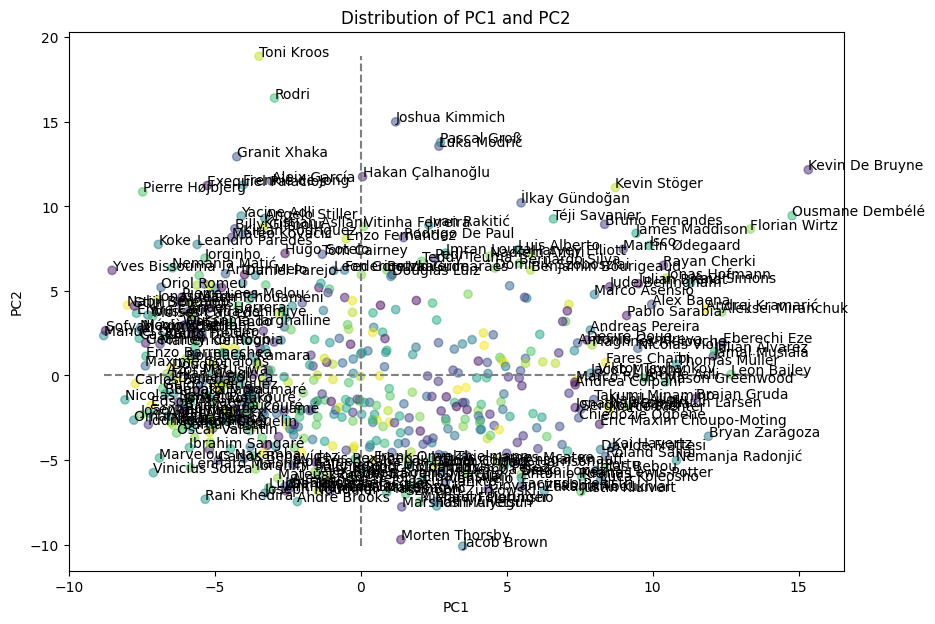

In [19]:
stampa_scatter(['PC1', 'PC2'], save = True)

In [21]:
corrs = loadings.copy(deep = True)

for col in corrs:
    corrs[col] = corrs[col] * np.sqrt(eigens[col])

corrs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
games,0.087311,0.145558,-0.070899,0.338673,-0.154702,0.237306,0.090185,-0.202806,0.489464,0.155000
goals,0.587016,0.177204,0.211928,0.547285,-0.320242,-0.198041,0.125176,-0.098414,0.153331,0.061458
assists,0.533234,0.444587,-0.037475,0.273834,-0.000782,0.284445,-0.249717,-0.319448,0.262930,-0.022942
pens_att,0.213370,0.266070,-0.244834,0.250195,-0.117934,0.067972,0.342632,-0.099568,0.112133,0.150906
cards_yellow,-0.302762,0.079020,-0.044435,0.347471,0.042645,0.056906,0.254766,-0.157726,0.442247,0.186829
...,...,...,...,...,...,...,...,...,...,...
own_goals,-0.145600,0.012085,-0.026176,-0.052641,-0.014437,0.025639,0.060145,0.091043,0.054167,-0.196927
ball_recoveries_per90,-0.560957,0.291740,-0.002900,0.069933,0.274933,-0.154326,0.133786,-0.007030,0.113320,0.019665
aerials_won_per90,-0.229115,-0.333855,0.099938,0.438204,0.030234,0.222521,0.140577,0.484824,0.013093,-0.049515
aerials_lost_per90,0.053921,-0.488245,0.053627,0.276659,0.076198,0.070991,0.094566,0.442605,-0.087190,0.158432


In [22]:
corrs.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.115712,0.257570,0.046513,0.098862,0.064338,-0.018468,0.022218,0.011776,0.016905,-0.008940
std,0.480389,0.345650,0.261946,0.193774,0.200694,0.174378,0.155738,0.143461,0.138890,0.132318
min,-0.788690,-0.488245,-0.668456,-0.335101,-0.349850,-0.771942,-0.348107,-0.319448,-0.252543,-0.663974
25%,-0.304356,-0.006120,-0.035456,-0.026178,-0.030181,-0.098946,-0.069117,-0.071419,-0.066504,-0.062712
50%,0.151844,0.163158,0.090880,0.078476,0.026195,0.004901,0.022343,0.007618,0.003839,-0.017798
75%,0.564424,0.478179,0.217475,0.256551,0.165951,0.066804,0.126966,0.090503,0.108374,0.052095
max,0.876308,0.919825,0.458917,0.547285,0.610032,0.284445,0.379982,0.484824,0.489464,0.599598


In [26]:
for i in corrs.columns:
    print(f'{i}: {len(corrs[np.abs(corrs[i]) > 0.5])}')

PC1: 46
PC2: 25
PC3: 8
PC4: 1
PC5: 4
PC6: 2
PC7: 0
PC8: 0
PC9: 0
PC10: 2
